**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Matsuru Hoshi<br/>
Student Number: 300228879

Name: Yu-Chen Lee<br/>
Student Number: 300240688



### TO DO:
✅ Data Exploration (matsuru)\
✅ Data Pre-Processing 5 (matsuru)\
✅ Data Pre-Processing 6 (matsuru)\
🟥 Model Development & Evaluation 7 (renny)\
🟥 Model Development & Evaluation 8 (renny)\
🟥 Hyperparameter Optimization (both)\
🟥 Analysis of Results (both)\
🟥 Documentation & Resources (both)

## Importing Important Libaries

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [4]:
url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv'

diabetes_df = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [ ]:
diabetes_df

In [ ]:
diabetes_df.describe()

In [ ]:
diabetes_df.info()

#### Identifiying values of ambiguous attributes
- Gender
- Hypertension
- Heart Disease
- Smoking History
- Diabetes

The following cells counts the number of recurrent values in each attribute.

In [ ]:
diabetes_df.gender.value_counts()

We can expect 3 values for the `gender` attribute.

In [ ]:
diabetes_df.heart_disease.value_counts()

For `heart_disease`, it looks like we have binary values. 

In [ ]:
diabetes_df.hypertension.value_counts()

For `hypertension`, we have binary values as well. 

In [ ]:
diabetes_df.smoking_history.value_counts()

We have a finite (5) number of possible values for the `smoking_history`.

#### Identifying the target variable

In [ ]:
diabetes_df.diabetes.value_counts()

From the cell above, we have identified that the `diabetes` column/attribute is *binary*, and thus can be used in a binary classification task. From this, we can also conclude that it must represent whether the patient has diabetes (1 or 0 ≈ yes or no).

Thus, we can safely say that `diabetes` will be our target variable.

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

In [ ]:
diabetes_df.info()

#### Gender

We will look at the gender distribution of the dataset.

In [ ]:
diabetes_df.gender.hist(figsize=(5,3))

It appears there are slightly more women than men. "Other" is not large enough to appear on the graph.



In [ ]:
sns.countplot(diabetes_df, x="gender", hue="diabetes")
plt.title('Diabetes by Gender Disbtribution')
plt.show()

It is not entirely clear if this is significant, but it appears the diabetes-rate among men is higher than women.

#### Age

Let us take a look the histogram for age.

In [ ]:
sns.histplot(diabetes_df, x="age")
plt.show()

It appears there are some peaks. There are some outliers at the low and high ends and a slight rise in the middle.

We will plot a boxplot for the age attribute.

In [ ]:
sns.boxplot(diabetes_df, x="gender", y="age", hue="diabetes")
plt.show()

We can see from this boxplot that most diabetetic patients are closer to the 50-70 age mark. That said, there are multiple outliers that fall under the lower wisker of the diabetes-positive boxplot.

Furthermore, there appear to be no outliers in the upper wisker.

In [ ]:
sns.scatterplot(diabetes_df, x="age", y="diabetes", hue="diabetes")
plt.show()

It seems the scatter plot is not relevant. In fact, this makes sense I would guess. There are many people of all ages without diabetes. There is no strong relationship between age and diabetes.

#### Smoking History

In [ ]:
sns.histplot(diabetes_df, x="smoking_history")
plt.plot()

We will plot a more complex count plot to compare each category with the target variable.

In [ ]:
sns.countplot(diabetes_df, x="smoking_history", hue="diabetes")
plt.show()

It appears that having vs not having smoking history doesn't have a very strong correlation to having diabetes.

#### Body Mass Index (BMI)

We use plot a histogram for BMI.

In [ ]:
sns.histplot(diabetes_df, x="bmi")
plt.show()

There is clealry a specific value that was probably chosen for quick data collection... That said, this data looks fairly normal. Let us plot this against age and gender.

In [ ]:
sns.scatterplot(diabetes_df, x="age", y="bmi", hue="gender", palette="rocket")
plt.show()

This is very insightful. There appears to be no correlation with gender. However, we can see a slight increase of BMI between 30 to 60.

Let's see what we can see when we look at diabetes instead.

In [ ]:
sns.scatterplot(diabetes_df, x="age", y="bmi", hue="diabetes")
plt.show()

Of course, we already knew from the Age analysis that diabetes was higher with age, but it seems BMI also plays a certain role near certain ages. The points in the higher BMI range for their age class seem to be more likely to have diabetes.

Since this is a continuous value, we will use a scatter plot against the binary diabetes.

In [ ]:
sns.scatterplot(diabetes_df, x="bmi", y="diabetes", hue="diabetes")
plt.show()

There appears to be no correlation.

### HbA1c Level

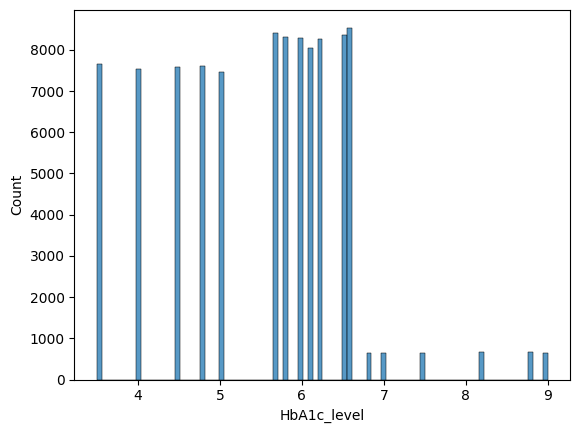

In [5]:
sns.histplot(diabetes_df, x="HbA1c_level")
plt.show()

This looks suspicously like the smoking_plot. Let us plot them against each other to see.

In [ ]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="smoking_history", hue="diabetes")
plt.show()

Nevermind, it appears there is no correlation. However, this does show something quite clearly. High HbA1c level is an indicator of diabetes. Let us plot it against the target variable instead.

In [ ]:
sns.barplot(diabetes_df, x="diabetes", y="HbA1c_level", hue="diabetes")
plt.show()

Clearly, above a HbA1c level of 7, the patient has diabetes. We can see from the previous cell that there are of course some outliers.

We will again plot a scatter plot to see any correlation between the continuous and binary value.

In [ ]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="diabetes", hue="diabetes")
plt.show()

Indeed, it appears that HbA1c level has a logistic curve relation with diabetes.

This makes sense since Hb1Ac is a type of blood-glucose test that shows your average blood-glucose levels in the past 2-3 months before the exam.

Source: [Medline Plus](https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/)

#### Blood Glucose Level

In [ ]:
sns.histplot(diabetes_df, x="blood_glucose_level")
plt.show()

Let's try the same scatter plot with blood-glucose level (a test taken showing current blood-glucose levels)

In [ ]:
sns.scatterplot(diabetes_df, x="blood_glucose_level", y="diabetes", hue="diabetes")
plt.show()

Likewise, while slightly less, blood-glucose level also has a similar logistic relationship to diabetes. Indeed, this a well-known factor of diabetes.

Let us try to plot HbA1c level against blood-glucose level and highlight diabetes.

In [ ]:
sns.scatterplot(diabetes_df, x="HbA1c_level", y="blood_glucose_level", hue="diabetes")
plt.show()

This is very enriching information. There is a clear correlation between the two variables. This should, however, come as no suprise since both are technically measuring blood-glucose levels, albeit at different times.

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

In [ ]:
sns.countplot(diabetes_df, x="diabetes", hue="diabetes")
plt.show()

There is a clear imbalance towards non diabetic (0). I suppose this is good... medically speaking? 

This could affect the model since it will likely be biased towards the dominant class. To ensure our model is predicting as intented, we will make use of good evaluation metrics that account for imbalances. These include:

- Precision
- Recall
- F1-Score

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [6]:
# splitting data train and test
diabetes_train, diabetes_test = train_test_split(diabetes_df, test_size=0.2, random_state=42)
X_train = diabetes_train.drop('diabetes', axis=1)
y_train = diabetes_train['diabetes']
X_test = diabetes_test.drop('diabetes', axis=1)
y_test = diabetes_test['diabetes']

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

There are 4 categorical variables to encode, `gender` and `smoking_history`.

In [ ]:
# visualizing training data
diabetes_train

Let's look closer at the values that they contain:

In [ ]:
diabetes_train.gender.value_counts()

In [ ]:
diabetes_df.hypertension.value_counts()

In [ ]:
diabetes_df.heart_disease.value_counts()

In [ ]:
diabetes_train.smoking_history.value_counts()

We note that `gender` contains generalized values in non-specific order.

However, we can see `smoking_history` has somewhat orderered values. This is the order I have come up with, from least to worse:

1. No Info
2. never
3. ever
4. former
5. not current
6. current

While some of the values have an obvious positioning, others are very ambiguous. For example, the Gov Canada [page](https://www.canada.ca/en/health-canada/services/health-concerns/tobacco/research/tobacco-use-statistics/terminology.html) on Tobacco Usage Classification defines "ever-smokers" as "current and former smokers combined." From a quick glance in the cell above, we can see this is not the case for this dataset.

Regardless, because they are combined this definition would only make sense when counting from a group, not for classifying individuals.

On the other hand, Wiktionary [defines](https://en.wiktionary.org/wiki/ever-smoker) it as:

> 1. A person who has ever (that is, at any time in their past) smoked tobacco (e.g., cigarettes, cigars, pipes).

> 2. (strictly, operational definition for epidemiology) More precisely, someone who has smoked more than 100 instances (e.g., cigarettes, cigars, pipe bowlfuls) in their lifetime.

As such, given the lower instances in the dataset, I have assumed 'ever' refers to someone who has smoked before at some point their life but does not consider themselves a "smoker" since they have never *actively* smoked.

Note that while this is what I have decided to go with, this is assuming that of all smokers of all time, the number of people who smoked before but never "got into it" is lower, while *most* still smoke (current) and *most* have smoked a lot in their lives (former). This why I have placed 'ever' before 'former.' Someone who is a former smoker, that is who was once a 'current' or regular smoker, is arguably more at risk than someone who *may* have smoked before, the 'ever.'

There is nothing to back this statement. These are just assumptions I have made.

As for 'not-current', I just assumed this means a current smoker whose last cigarette was smoked a longer interval of time than they are usually capable of. Say, 1 week since they last smoked. That said, they haven't given up smoking for as long as a former smoker, so they're still more of a smoker than a former smoker.

Again, these are all assumptions.

So for gender, hypertension, and heart_disease we will be using the `OneHotEncoder()` and for smoking_history `OrdinalEncoder()` with the order specified above.

We will specifiy the order for smoking, and force the encoding in the next question, so that the scaling and encoding can both be done in the same column transformer.

In [7]:
# categories of smoking_history (from "lowest" to "highest")
smoking_classification_order = [['No Info', 'never', 'ever', 'former', 'not current', 'current']]

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

Based on our earlier analysis of the variables, I've identified that the best scaler to use is: `RobustScaler`

This is because the most important features identified that correlate the most with the targer variable often have outliers. StandardScaler and MinMax would not do so well with outliers in the dataset. Features that are already normal won't be affected too much by the RobustScaler transformation.

Furthermore, while it is possible to apply different transformations that fit each feature best, this would not be good for the kinds of models we will be fitting the data to. Since we will be using KNN and Logistic Regression which are both models sensitive to ranges, it is best to ensure all features are transformed with the same transformation.

For this reason, we will be using RobustScaler.


In [11]:
# column transformer to apply encoding and scaling
full_pipeline = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['gender', 'hypertension', 'heart_disease']),
    ('ord', OrdinalEncoder(categories=smoking_classification_order), ['smoking_history']),
    ('scal', RobustScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
])


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [12]:
modelDtree = Pipeline(steps=[
    ('preprocessor',full_pipeline),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

modelDtree.fit(X_train,y_train)

modelKNN = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

modelKNN.fit(X_train,y_train)

modelLR = Pipeline(steps=[
    ('preprocessor',full_pipeline),
    ('classifier',LogisticRegression(random_state=42, max_iter=200))
])

modelLR.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['gender', 'hypertension',
                                                   'heart_disease']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'Info',
                                                                              'never',
                                                                              'ever',
                                                                              'former',
                                                                              'not '
                                                                              'current',
                                                                              'current']]),
                                                  ['smoking_history']),
                                                 ('scal', RobustScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level'])])),
                ('classifier',
                 LogisticRegression(max_iter=200, random_state=42))])

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [ ]:
y_predDtree = modelDtree.predict(X_test)
y_predKNN = modelKNN.predict(X_test)
y_predLR = modelLR.predict(X_test)
print("Evaluation for Decision Trees:")
print(classification_report(y_test, y_predDtree))
print("Evaluation for KNN:")
print(classification_report(y_test, y_predKNN))
print("Evaluation for Logistic Regression:")
print(classification_report(y_test, y_predLR))

Evaluation for Decision Trees:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.73      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Evaluation for KNN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.60      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Evaluation for Logistic Regression:


'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98     18292\n           1       0.87      0.61      0.72      1708\n\n    accuracy                           0.96     20000\n   macro avg       0.92      0.80      0.85     20000\nweighted avg       0.96      0.96      0.96     20000\n'

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [39]:
# Code cell

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [40]:
# Code cell

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

Environment Setup
- https://anaconda.org/anaconda/seaborn

Data Understanding
- https://www.canada.ca/en/health-canada/services/health-concerns/tobacco/research/tobacco-use-statistics/terminology.html
- https://en.wiktionary.org/wiki/ever-smoker
